In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import datetime
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [2]:
def load_data():
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')
    return train_df, test_df

In [3]:
train_df, test_df = load_data()

In [4]:
train_df 

,price,desc,ad_id,location,timestamp,mileage,brand,model,year,fuel,transmission,color,car_type
0,569000,"""เลขไมล์5,700กิโลแท้ 1.3 SP โฉมปัจจุบัน รถ2เดื...",354186401,กรุงเทพมหานคร,1584521455,5700,Mazda,Mazda2 Sport,2020,เบนซิน,เกียร์อัตโนมัติ,เทา,รถเก๋ง
1,1150000,ขาย Chevrolet c10 ปี 1965 รถแท้ ขับขวา พร้อมโอ...,356227846,กรุงเทพมหานคร,1591021387,1234,Chevrolet,รุ่นอื่นๆ,1965,เบนซิน,เกียร์อัตโนมัติ,แดง,รถอื่น ๆ
2,799000,📢มาแว้วว... ลค.ที่ชอบรถสีขาว​ ใสๆเลย\nใครเร็วก...,356055202,นนทบุรี,1590502642,100000,Mitsubishi,Pajero Sport,2016,ดีเซล,เกียร์อัตโนมัติ,ขาว,รถ MPV / SUV
3,429000,รหัส 130/v36\n2010 toyota CAMRY 2.4 hybrid nav...,356169430,กรุงเทพมหานคร,1590844871,184921,Toyota,Camry,2010,ไฮบริด,เกียร์อัตโนมัติ,ดำ,รถเก๋ง
4,268000,เครื่อง 1.2 E โฉมไฟใหม่ พ.พาวเวอร์ ก.ไฟฟ้า ซทล...,354415016,กรุงเทพมหานคร,1585546785,103000,Nissan,Almera,2016,เบนซิน,เกียร์อัตโนมัติ,ขาว,รถเก๋ง
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7098,1990000,E200 Cabriolet AMG ทั้งคัน\nออกป้ายแดงรถสวยมาก...,355302374,กรุงเทพมหานคร,1588207277,NaN,Mercedes-Benz,E-Class,2015,เบนซิน,เกียร์อัตโนมัติ,ดำ,รถเก๋ง
7099,299000,บ60/243 #MITSUBISHI #TRITON 2.5 GLS PLUS\nปี 2...,356181327,กรุงเทพมหานคร,1590894498,169376,Mitsubishi,Triton,2010,ดีเซล,เกียร์ธรรมดา,เทา,รถกระบะ
7100,1290000,✅ BMW X1 1.8D Xline ปี 2016\n✅ สีดำ (เบาะน้ำ...,356240397,กรุงเทพมหานคร,1591080235,89000,BMW,X1,2016,ดีเซล,เกียร์อัตโนมัติ,ดำ,รถ MPV / SUV
7101,479000,Honda BR-V ตัวSV 1.500cc เกียร์ออโต้ ปี 2016\n...,354592540,สมุทรปราการ,1586149800,NaN,Honda,BR-V,2016,เบนซิน,เกียร์อัตโนมัติ,ส้ม,รถ MPV / SUV


In [5]:
test_df

,price,desc,ad_id,location,timestamp,mileage,brand,model,year,fuel,transmission,color,car_type
0,549000,"Option: เครื่องเล่น CD, USB, กระจกไฟฟ้า, เซ็นท...",354696215,นนทบุรี,1586421506,31200,Ford,Ranger,2017,ดีเซล,เกียร์อัตโนมัติ,ดำ,รถกระบะ
1,358000,ขายรถบ้าน 2006 ISUZU MU-7 แรงๆๆ (เงินสดลดได้)\...,354237756,สมุทรปราการ,1584748598,267000,Isuzu,MU-7,2006,ดีเซล,เกียร์อัตโนมัติ,บรอนซ์เงิน,รถ MPV / SUV
2,529000,🔥แคปเปิดได้ 🔥รุ่นใหม่ล่าสุด 🔥แรง ประหยัด เครื่...,352545121,กรุงเทพมหานคร,1577353632,8,Toyota,Hilux Revo,2019,ดีเซล,เกียร์ธรรมดา,ขาว,รถกระบะ
3,1135000,TOYOTA NEW FORTUNER 2.8 V 4WD SUV AUTO ปี 2015...,356194406,เชียงใหม่,1590918420,100000,Toyota,Fortuner,2015,ดีเซล,เกียร์อัตโนมัติ,ขาว,รถ MPV / SUV
4,469000,💢 ออกรถ 999 บ. 💢\n#ฟรี#ออกรถพร้อมประกันตัวรถ 1...,355315874,นนทบุรี,1588235606,NaN,Toyota,Hilux Vigo,2015,ดีเซล,เกียร์ธรรมดา,เทา,รถกระบะ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,1938000,BENZ C220d EXCLUSIVE ปี 2020 โฉมใหม่ป้ายแดง\n\...,356044791,กรุงเทพมหานคร,1590482052,21000,Mercedes-Benz,C-Class,2020,ดีเซล,เกียร์อัตโนมัติ,ดำ,รถเก๋ง
1772,279000,รถสภาพพร้อมใช้ ตัวท็อป ดูแลรักษาอย่างดี ไมล์แท...,356187826,กรุงเทพมหานคร,1590906984,NaN,Toyota,Vios,2012,เบนซิน,NaN,NaN,รถเก๋ง
1773,439000,รหัส Vat1/154v\n2016 honda Jazz 1.5 S สีเทา\nว...,356168695,กรุงเทพมหานคร,1590843416,76508,Honda,Jazz,2016,เบนซิน,เกียร์ธรรมดา,เทา,รถเก๋ง
1774,495000,ปี2016 FORD RANGER 4ประตู HI-RIDER 2.2 XLT A/T...,356197697,ปทุมธานี,1590925199,100000,Ford,Ranger,2016,ดีเซล,เกียร์อัตโนมัติ,ดำ,รถกระบะ


# Explanatory Data Analysis

In [6]:
train_df.isna().sum()

price              0
desc             171
ad_id              0
location           0
timestamp          0
mileage         1662
brand              0
model              0
year               0
fuel               0
transmission     213
color            255
car_type           0
dtype: int64

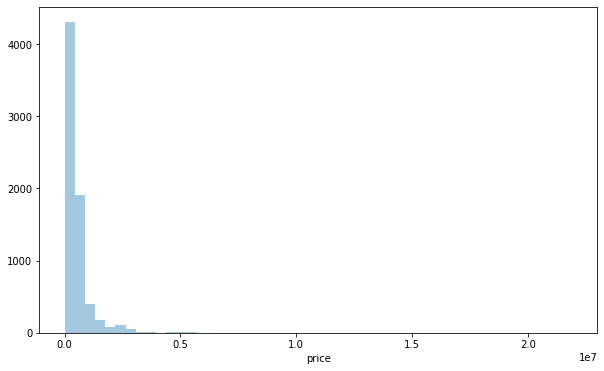

In [7]:
# PRICE
plt.figure(figsize=(10,6))
sns.distplot(train_df['price'], bins=50, kde=False)

In [8]:
# DESC
train_df['desc']

0       "เลขไมล์5,700กิโลแท้ 1.3 SP โฉมปัจจุบัน รถ2เดื...
1       ขาย Chevrolet c10 ปี 1965 รถแท้ ขับขวา พร้อมโอ...
2       📢มาแว้วว... ลค.ที่ชอบรถสีขาว​ ใสๆเลย\nใครเร็วก...
3       รหัส 130/v36\n2010 toyota CAMRY 2.4 hybrid nav...
4       เครื่อง 1.2 E โฉมไฟใหม่ พ.พาวเวอร์ ก.ไฟฟ้า ซทล...
                              ...                        
7098    E200 Cabriolet AMG ทั้งคัน\nออกป้ายแดงรถสวยมาก...
7099    บ60/243 #MITSUBISHI #TRITON 2.5 GLS PLUS\nปี 2...
7100    ✅ BMW X1  1.8D Xline ปี 2016\n✅ สีดำ  (เบาะน้ำ...
7101    Honda BR-V ตัวSV 1.500cc เกียร์ออโต้ ปี 2016\n...
7102    รถสวย มือเดียป้ายแดง\nไม่ให้เลขทะเบียนครับ\n\n...
Name: desc, Length: 7103, dtype: object

In [9]:
train_df['desc'].apply(lambda x: len(str(x).strip().replace(' ','').replace('\n','')))

0        426
1        115
2        599
3        158
4        250
        ... 
7098      88
7099     619
7100     175
7101    1525
7102     408
Name: desc, Length: 7103, dtype: int64

In [10]:
# LOCATION
train_df['location'].value_counts()

กรุงเทพมหานคร    4217
นนทบุรี           806
ชลบุรี            299
เชียงใหม่         286
ปทุมธานี          240
                 ... 
อุตรดิตถ์           2
สกลนคร              1
สตูล                1
ยโสธร               1
นราธิวาส            1
Name: location, Length: 72, dtype: int64

In [11]:
# TIMESTAMP
train_df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))

0      2020-03-18 15:50:55
1      2020-06-01 21:23:07
2      2020-05-26 21:17:22
3      2020-05-30 20:21:11
4      2020-03-30 12:39:45
               ...        
7098   2020-04-30 07:41:17
7099   2020-05-31 10:08:18
7100   2020-06-02 13:43:55
7101   2020-04-06 12:10:00
7102   2020-02-20 19:27:34
Name: timestamp, Length: 7103, dtype: datetime64[ns]

In [12]:
#MILEAGE
test = train_df['mileage'].fillna(0)
test[1620] = 0
test[3164] = 0
test[3937] = 0
test_ = pd.to_numeric(test)

In [13]:
test_

0         5700.0
1         1234.0
2       100000.0
3       184921.0
4       103000.0
          ...   
7098         0.0
7099    169376.0
7100     89000.0
7101         0.0
7102    310000.0
Name: mileage, Length: 7103, dtype: float64

In [14]:
test_[test_!=0]

0         5700.0
1         1234.0
2       100000.0
3       184921.0
4       103000.0
          ...   
7096     90000.0
7097    208000.0
7099    169376.0
7100     89000.0
7102    310000.0
Name: mileage, Length: 5336, dtype: float64

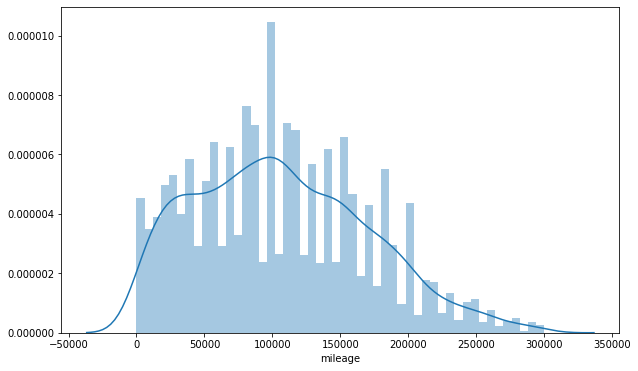

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(test_[(test_!=0) & (test_<3*10**5)], bins=50)

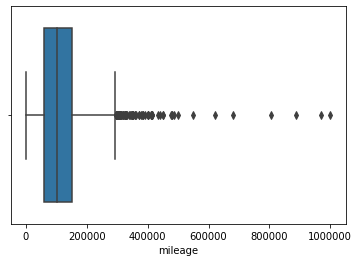

In [16]:
sns.boxplot(test_[(test_!=0) & (test_<10**6)])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3637 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3627 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3657 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3629 missing from current font.

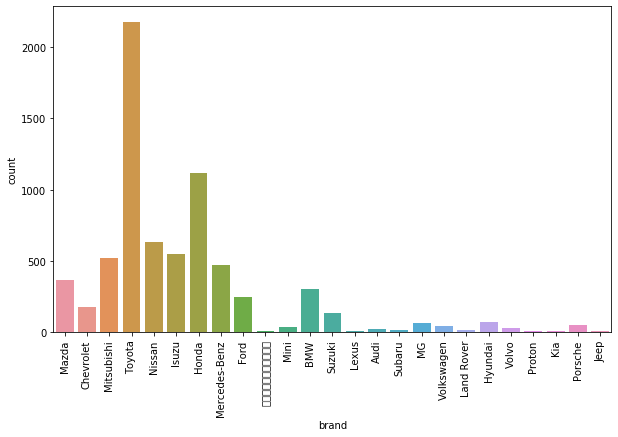

In [17]:
# BRAND
plt.figure(figsize=(10,6))
chart = sns.countplot(x='brand', data=train_df)
plt.xticks(
    rotation=90, 
)

In [18]:
# MODEL
train_df['model'].unique()

array(['Mazda2 Sport', 'รุ่นอื่นๆ', 'Pajero Sport', 'Camry', 'Almera',
       'D-MAX', 'BIG-M', 'Camaro', 'Jazz', 'Civic', 'Vios', 'CLA-Class',
       'City', 'Ranger', 'Mazda3', 'HR-V', 'ONE', 'Avanza',
       'NP300-NAVARA', 'Hi-Lander', 'Triton', 'Lancer', 'Innova',
       'Fiesta', 'Soluna', 'Series 5', 'Mazda2 Elegance', 'Everest',
       'Hilux Vigo Champ', 'Fortuner', 'Hilux Revo', 'Series 3', 'CR-V',
       'MU-X', 'Ciaz', 'Aveo', 'Juke', 'A-Class', 'Mirage', 'Ecosport',
       'Odyssey', 'Accord', 'E-Class', 'Pajero', 'Vellfire', 'Altis',
       'Commuter', 'Yaris', 'Hilux Hero', 'COOPER', 'Hilux Vigo D4D',
       'BT-50', 'Brio Amaze', 'ES300', 'Audi TT ', 'C-Class', 'Carry',
       'Impreza', 'MG3', 'Freed', 'CX-3', 'Brio', 'Caravelle', 'X-Trail',
       'Alphard', 'Vito', 'Sylphy', 'Trailblazer', 'Estima', 'Sienta',
       'Wish', 'Prelude', 'X1', 'Freelander', 'BT-50 Pro', 'March',
       'CX-5', 'Grand Starex', 'H-1 ', 'Hilux Vigo', 'Captiva', 'Escape',
       'Swift', 'S

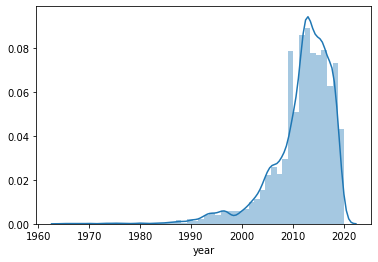

In [19]:
# YEAR
sns.distplot(train_df['year'])

In [20]:
# FUEL
train_df['fuel'].unique()

array(['เบนซิน', 'ดีเซล', 'ไฮบริด', 'เบนซิน + LPG', 'เบนซิน + NGV',
       'ดีเซล + NGV', 'LPG', 'NGV', 'ดีเซล + LPG'], dtype=object)

In [21]:
# TRANSMISSION
train_df['transmission'].unique()

array(['เกียร์อัตโนมัติ', nan, 'เกียร์ธรรมดา'], dtype=object)

In [22]:
train_df['transmission'].isna().sum()

213

In [23]:
# COLOR
train_df['color'].unique()

array(['เทา', 'แดง', 'ขาว', 'ดำ', nan, 'เหลือง', 'ฟ้า', 'ส้ม',
       'บรอนซ์เงิน', 'น้ำเงิน', 'เขียว', 'บรอนซ์ทอง', 'น้ำตาล', 'ม่วง',
       'ชมพู', 'ครีม'], dtype=object)

In [24]:
# CAR_TYPE
train_df['car_type'].unique()

array(['รถเก๋ง', 'รถอื่น ๆ', 'รถ MPV / SUV', 'รถกระบะ', 'รถตู้'],
      dtype=object)

# Fill Missing Values

In [25]:
def fill_na(df):
    fill_df = df.copy()
    fill_df['desc'] = fill_df['desc'].fillna('')
    fill_df['mileage'] = fill_df['mileage'].fillna(-1)
    fill_df['transmission'] = fill_df['transmission'].fillna('no data')
    fill_df['color'] = fill_df['color'].fillna('no data')
    return fill_df

In [26]:
train_df_filled = fill_na(train_df)
test_df_filled = fill_na(test_df)

# Data Preprocessing & Feature Extraction

In [27]:
def preprocessing(df):
    
    feat = df.copy()
    
    #DESC - drop it, change to length of desc
    feat['length_desc'] = feat['desc'].apply(lambda x: len(str(x).strip().replace(' ','').replace('\n','')))
    feat = feat.drop('desc', axis=1)
    #AD_ID - already dropped
    
    #LOCATION - do nothing here, wait for feature extraction
    def sort_location(x):
        if x not in ['กรุงเทพมหานคร', 'นนทบุรี', 'ชลบุรี', 'เชียงใหม่', 'ปทุมธานี','สมุทรปราการ', 'นครปฐม']:
            x = 'Other City'
        return x
    feat['location'] = feat['location'].apply(lambda x: sort_location(x))
    
    #TIMESTAMP - change timestamp to datetime
    feat['timestamp'] = feat['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))
    
    #MILEAGE - do nothing here, wait for feature extraction
    def fix_mileage(x):
        try:
            x = int(x)
        except:
            x = -1
        return x
    feat['mileage'] = feat['mileage'].apply(lambda x: fix_mileage(x))
#     scaler = RobustScaler()
#     feat['mileage'] = scaler.fit_transform(feat['mileage'].values.reshape(-1,1))
    
    #BRAND - do nothing here, wait for feature extraction
    
    #MODEL - do nothing here, wait for feature extraction
    
    #YEAR - do nothing here, wait for feature extraction
    def sort_year(x):
        if x<2000:
            x='before 2000s'
        return str(x)
    feat['year'] = feat['year'].apply(lambda x: sort_year(x))
    
    #FUEL - do nothing here, wait for feature extraction

    #COLOR - do nothing here, wait for feature extraction
            
    #CAR_TYPE - do nothing here, wait for feature extraction
    
    return feat

In [28]:
train_df_data = preprocessing(train_df_filled)
test_df_data = preprocessing(test_df_filled)

In [29]:
train_df_data.head()

,price,ad_id,location,timestamp,mileage,brand,model,year,fuel,transmission,color,car_type,length_desc
0,569000,354186401,กรุงเทพมหานคร,2020-03-18 15:50:55,5700,Mazda,Mazda2 Sport,2020,เบนซิน,เกียร์อัตโนมัติ,เทา,รถเก๋ง,426
1,1150000,356227846,กรุงเทพมหานคร,2020-06-01 21:23:07,1234,Chevrolet,รุ่นอื่นๆ,before 2000s,เบนซิน,เกียร์อัตโนมัติ,แดง,รถอื่น ๆ,115
2,799000,356055202,นนทบุรี,2020-05-26 21:17:22,100000,Mitsubishi,Pajero Sport,2016,ดีเซล,เกียร์อัตโนมัติ,ขาว,รถ MPV / SUV,599
3,429000,356169430,กรุงเทพมหานคร,2020-05-30 20:21:11,184921,Toyota,Camry,2010,ไฮบริด,เกียร์อัตโนมัติ,ดำ,รถเก๋ง,158
4,268000,354415016,กรุงเทพมหานคร,2020-03-30 12:39:45,103000,Nissan,Almera,2016,เบนซิน,เกียร์อัตโนมัติ,ขาว,รถเก๋ง,250


In [30]:
def drop_columns(df):
    drop_feat = df.copy()
    drop_feat = drop_feat.drop(['ad_id','timestamp','model','color'], axis=1)
    return drop_feat

In [31]:
train_df_data_dropped = drop_columns(train_df_data)
test_df_data_dropped = drop_columns(test_df_data)

In [32]:
train_df_data_dropped

,price,location,mileage,brand,year,fuel,transmission,car_type,length_desc
0,569000,กรุงเทพมหานคร,5700,Mazda,2020,เบนซิน,เกียร์อัตโนมัติ,รถเก๋ง,426
1,1150000,กรุงเทพมหานคร,1234,Chevrolet,before 2000s,เบนซิน,เกียร์อัตโนมัติ,รถอื่น ๆ,115
2,799000,นนทบุรี,100000,Mitsubishi,2016,ดีเซล,เกียร์อัตโนมัติ,รถ MPV / SUV,599
3,429000,กรุงเทพมหานคร,184921,Toyota,2010,ไฮบริด,เกียร์อัตโนมัติ,รถเก๋ง,158
4,268000,กรุงเทพมหานคร,103000,Nissan,2016,เบนซิน,เกียร์อัตโนมัติ,รถเก๋ง,250
...,...,...,...,...,...,...,...,...,...
7098,1990000,กรุงเทพมหานคร,-1,Mercedes-Benz,2015,เบนซิน,เกียร์อัตโนมัติ,รถเก๋ง,88
7099,299000,กรุงเทพมหานคร,169376,Mitsubishi,2010,ดีเซล,เกียร์ธรรมดา,รถกระบะ,619
7100,1290000,กรุงเทพมหานคร,89000,BMW,2016,ดีเซล,เกียร์อัตโนมัติ,รถ MPV / SUV,175
7101,479000,สมุทรปราการ,-1,Honda,2016,เบนซิน,เกียร์อัตโนมัติ,รถ MPV / SUV,1525


In [33]:
def feature_engineer(df):
    feat = df.copy()
    cat_data = ['brand','transmission','car_type','year','location','transmission','car_type']
    num_data = ['mileage', 'length_desc']
    mlb = MultiLabelBinarizer() 
    fuel_col = pd.DataFrame(mlb.fit_transform(s.split(' + ') for s in feat['fuel']), columns=['fuel_1','fuel_2','fuel_3','fuel_4','fuel_5'])
    feat = pd.concat([feat, fuel_col], axis=1).drop('fuel', axis=1)
    feat = pd.get_dummies(feat, columns=cat_data)
    return feat

In [34]:
train_df_feature = feature_engineer(train_df_data_dropped)
test_df_feature = feature_engineer(test_df_data_dropped)

In [35]:
train_df_feature.head(10)

,price,mileage,length_desc,fuel_1,fuel_2,fuel_3,fuel_4,fuel_5,brand_Audi,brand_BMW,...,location_สมุทรปราการ,location_เชียงใหม่,transmission_no data,transmission_เกียร์ธรรมดา,transmission_เกียร์อัตโนมัติ,car_type_รถ MPV / SUV,car_type_รถกระบะ,car_type_รถตู้,car_type_รถอื่น ๆ,car_type_รถเก๋ง
0,569000,5700,426,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1150000,1234,115,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,799000,100000,599,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,429000,184921,158,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,268000,103000,250,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5,458000,-1,74,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6,29500,-1,116,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
7,2990000,12000,330,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8,459000,90000,358,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9,165000,-1,920,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


# Train Model

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
def train_model(X_train, y_train, model):
    model = model
    model.fit(X_train, y_train)
    return model

In [38]:
def eval_acc(actual, prediction):
    acc = mean_squared_error(actual, prediction)
    acc2 = r2_score(actual, prediction)
    print('RMSE :', np.sqrt(acc))
    print('R-Squared: ', acc2)
    return acc, acc2

In [39]:
def pipeline(X_train, y_train, X_test, y_test, model):
    model = train_model(X_train, y_train, model)
    prediction = model.predict(X_test)
    acc, acc2 = eval_acc(y_test, prediction)
    return acc, acc2

In [44]:
X_train = train_df_feature.drop('price', axis=1)
y_train = train_df_feature['price']
X_test = test_df_feature.drop('price', axis=1)
y_test = test_df_feature['price']
pipeline(X_train, y_train, X_test, y_test, LinearRegression())

RMSE : 386626.9996446894
R-Squared:  0.5979197518692028


(149480436854.25464, 0.5979197518692028)